In [311]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [332]:
from src.data_loader import ViTDataLoader
from src.vit_train import ViTTrainer, load_model_dir, load_model_config
import importlib
from src.vit_data import load_cd_data

config_name = 'complex_120'
config = importlib.import_module(f"config.{config_name}")
vit = load_model_config(config)
vit_data = load_cd_data()

dataloader = ViTDataLoader(vit_data, split_type=config.SPLIT_TYPE, split_arg=config.SPLIT_ARG)
print(dataloader.split_repr())

trainer = ViTTrainer(vit, config_name, dataloader)

Split: time,120.0; Training: 19921; Validation: 2214; Testing: 4427


In [333]:
device = trainer.device
vit = trainer.vit

In [334]:
trainer.setup()

Creating directory: output/complex_120_20220526_0acf...


In [335]:
vit.load_state_dict(torch.load('output/complex_120_20220524_1abd/model.torch', map_location=torch.device('cpu')))

<All keys matched successfully>

In [336]:
# trainer.train()

In [397]:
trainer.compute_predictions_losses(max_num=1000)

In [398]:
print(trainer.perf_str)

Loss:
  Train:	0.074
  Valid:	0.095
  Test: 	0.689

R2:
  Train:	0.929
  Valid:	0.904
  Test: 	0.246


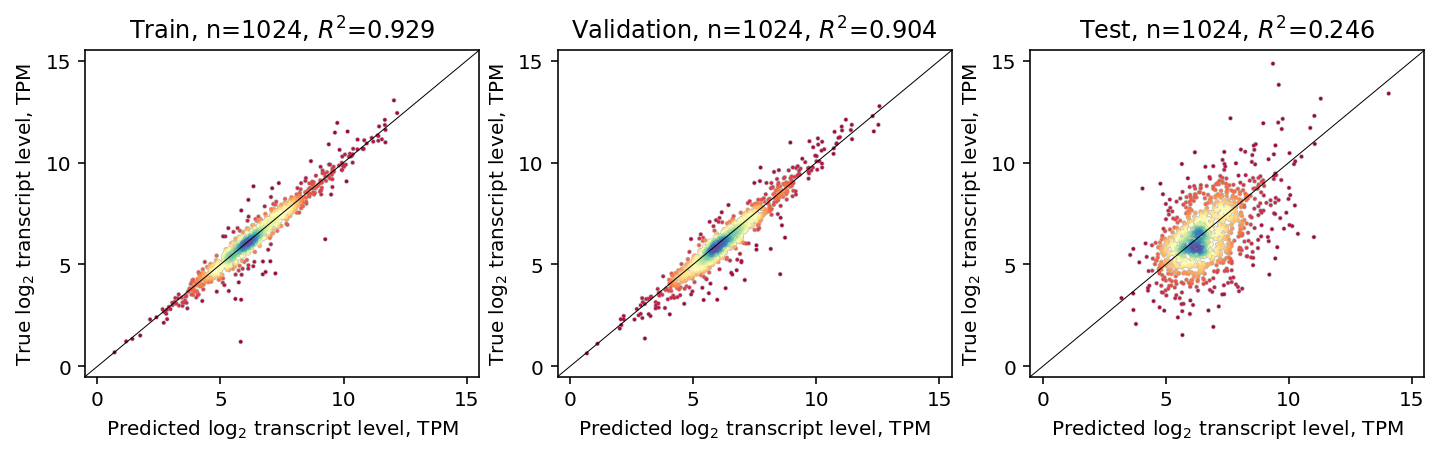

In [404]:
trainer.plot_predictions()